In [123]:
# Import Data
f = open('poverty.txt')
data = []

for line in f.readlines():
    row = line.split('\t')
    if row[0] == 'Location':
        continue
    data.append((float(row[1]), float(row[2]))) 

In [124]:
# Plotting a line
import matplotlib.pyplot as plt

def plot_graph_and_line(data, intercept, slope):
    x_points = []
    for point in data:
        x_points.append(point[0])

    y_points = []
    for point in data:
        y_points.append(point[1])

    plt.scatter(x_points, y_points)
    plt.axline((0, intercept), slope=slope, color='k')
    plt.title('Linear Regression')
    plt.xlabel('Y Axis')
    plt.ylabel('X Axis')

    plt.show()

In [125]:
# Average squared distance from point to line
import numpy

def distance_from_point_to_line(point, intercept, slope):
    expected_value_for_point = slope*point[0] + intercept
    return point[1] - expected_value_for_point

def squared_distance_from_point_to_line(point, intercept, slope):
    return distance_from_point_to_line(point, intercept, slope) ** 2

def average_squared_distance_from_points_to_line(points,intercept, slope):
    squared_distances = []
    for point in points:
        squared_distances.append(squared_distance_from_point_to_line(point, intercept, slope))
    
    return numpy.mean(squared_distances)

In [127]:
average_squared_distance_from_points_to_line(data, 1, 1)

98.76313725490196

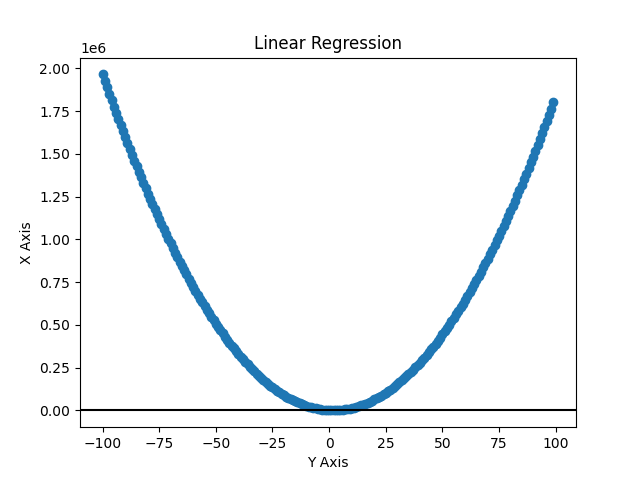

In [60]:
# Best possible m given c = 0

slope_data = []

for slope in range(-100, 100):
    error = average_squared_distance_from_points_to_line(data, 0, slope)
    slope_data.append((slope, error))

plot_graph_and_line(slope_data, 0,0)

1.6678240993484572


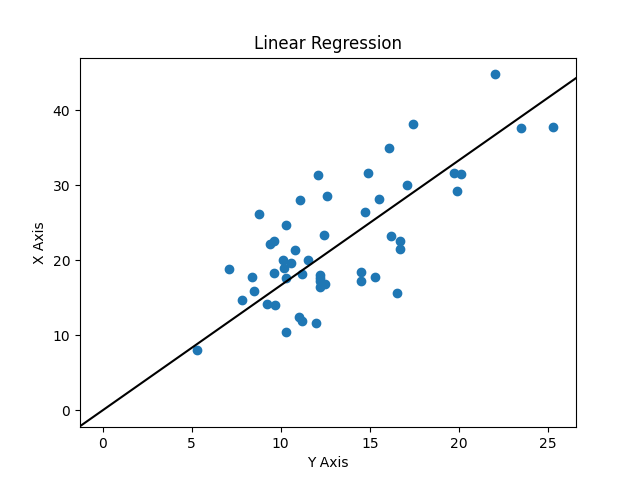

In [128]:
# One variable
learning_rate = 0.0001

def partial_derivative_with_respect_to_slope(points, intercept, slope):
    inner_sum = [(point[1]-(slope*point[0]+intercept))*(-point[0]) for point in points]
    return 2*(1/len(points))*sum(inner_sum)


old_slope = 1
partial_derivative = 1

while abs(partial_derivative) > 0.05:
    partial_derivative = partial_derivative_with_respect_to_slope(data, 0, old_slope)
    old_slope = old_slope - learning_rate*partial_derivative_with_respect_to_slope(data, 0, old_slope)


print(old_slope)

plot_graph_and_line(data, 0, old_slope)

1.568050731862445 4.043244312921486
35.70966228655592


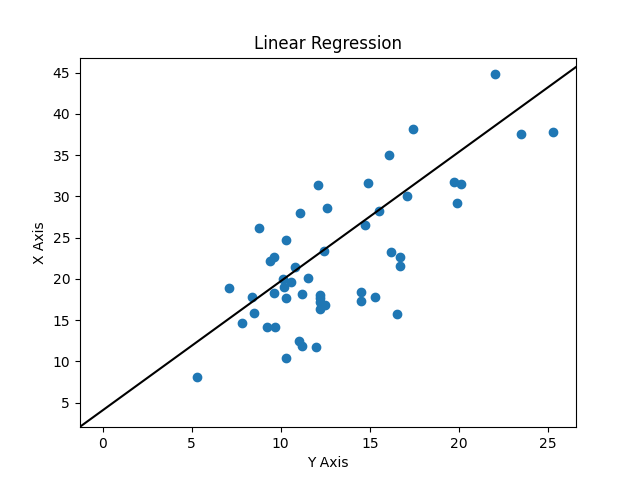

In [122]:
## Two variables
learning_rate = 0.000001

def partial_derivative_with_respect_to_slope(points, intercept, slope):
    inner_sum = [(point[1]-(slope*point[0]+intercept))*(-point[0]) for point in points]
    return (1/len(points))*sum(inner_sum)

def partial_derivative_with_respect_to_intercept(points, intercept, slope):
    inner_sum = [(point[1]-(slope*point[0]+intercept))*(-1) for point in points]
    return (1/len(points))*sum(inner_sum)


old_slope = 1
old_intercept = 4

partial_derivative_for_slope = 1
partial_derivative_for_intercept = 1

# while abs(partial_derivative_for_slope) > 0.000005 and abs(partial_derivative_for_intercept) > 0.000005:
for i in range(1,10000):
    partial_derivative_for_slope = partial_derivative_with_respect_to_slope(data, 0, old_slope)
    partial_derivative_for_intercept = partial_derivative_with_respect_to_intercept(data, 0, old_slope)
    old_intercept = old_intercept - learning_rate*partial_derivative_for_intercept
    old_slope = old_slope - learning_rate*partial_derivative_for_slope


print(old_slope, old_intercept)
print(average_squared_distance_from_points_to_line(data, old_intercept, old_slope))
plot_graph_and_line(data, old_intercept, old_slope)

In [101]:
A = numpy.vstack([[point[0] for point in data], numpy.ones(len(data))]).T
m, c = numpy.linalg.lstsq(A, [point[1] for point in data], rcond=None)[0]
print(m,c)
print(average_squared_distance_from_points_to_line(data, c, m))

1.373345388695398 4.267292842407431
29.600678981373857
